In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [51]:
df = pd.read_csv("./data/c1.csv", parse_dates=['Datetime'])
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)
y = df['Consumption']
y.head()

Datetime
1988-01-01    107.5052
1988-02-01    105.6720
1988-03-01     97.4502
1988-04-01     92.4714
1988-05-01     90.3151
Name: Consumption, dtype: float64

In [52]:
train_size = int(len(y) * 0.8)

train = y.iloc[:train_size]
test = y.iloc[train_size:]

In [53]:
model = ARIMA(train, order=(2, 1, 2))
results = model.fit()


print("AIC: ", results.aic)
print("BIC: ", results.bic)

AIC:  1649.052671579056
BIC:  1667.8313826469907


In [54]:
ljung_box = acorr_ljungbox(results.resid.dropna(), lags=[1], return_df=False)
print(ljung_box)

    lb_stat  lb_pvalue
1  0.421069   0.516404


In [55]:
next_steps = len(test)
forecast_values = results.forecast(next_steps)

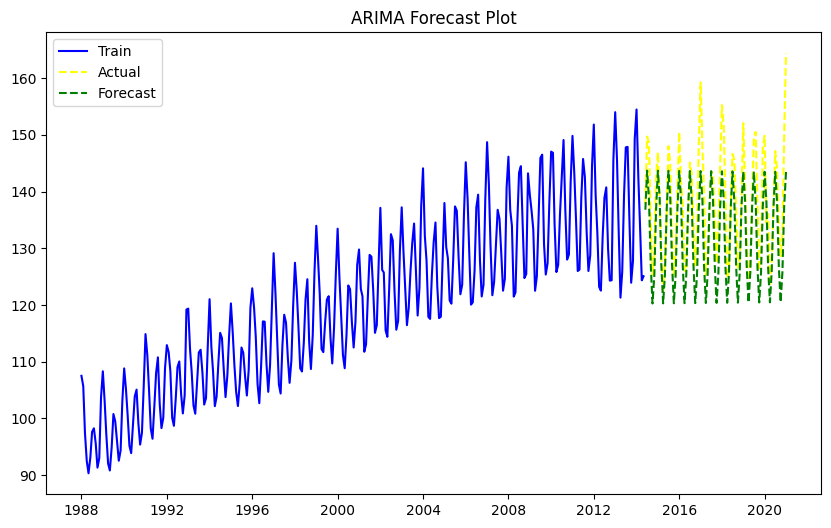

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(train, color='blue', label='Train')
plt.plot(test, color='yellow', label='Actual', linestyle='--')
plt.plot(forecast_values, color='green', label='Forecast', linestyle='--')
plt.title("ARIMA Forecast Plot")
plt.legend()
plt.show()

In [57]:
results_resid = results.resid[250:]

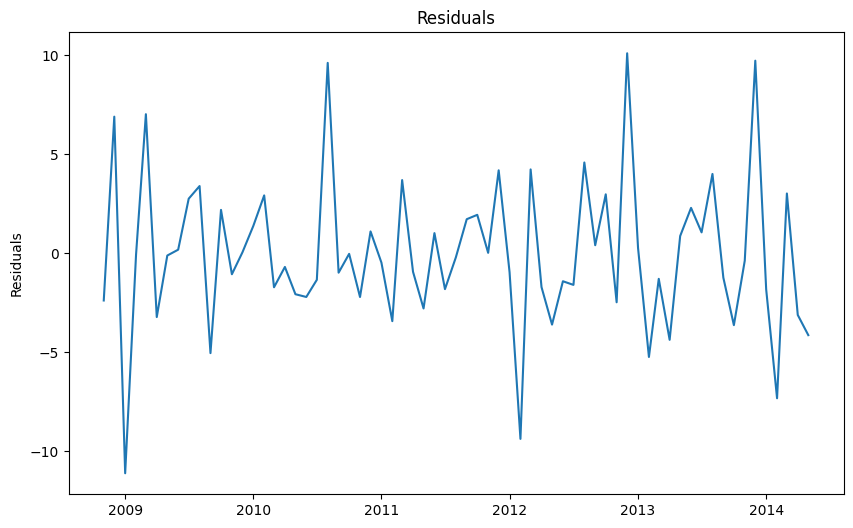

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(results_resid)
plt.title("Residuals")
plt.ylabel("Residuals")
plt.show()

In [59]:
mae = mean_absolute_error(test, forecast_values)
mape = mean_absolute_percentage_error(test, forecast_values)
mse = mean_squared_error(test, forecast_values)
rmse = (mse ** 0.5)

print("Mean Absolute Error: ", mae)
print("Mean Absolute Percentage Error: ", mape)
print("Root Mean Square Error: ", rmse)

Mean Absolute Error:  5.688241044063615
Mean Absolute Percentage Error:  0.04046499118905981
Root Mean Square Error:  7.020919806083099
